<a href="https://colab.research.google.com/github/Soundharya2004/TNSDC2/blob/main/Machine_Learning_Models_for_Stock_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [3]:
stock_price_df = pd.read_csv('stock.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
stock_vol_df = pd.read_csv('stock_volume.csv')
stock_vol_df


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [6]:
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [7]:
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [8]:
stock_price_df.isnull().sum()


Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [9]:
stock_vol_df.isnull().sum()


Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [10]:
stock_price_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 250.1+ KB


In [11]:
stock_vol_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 250.1+ KB


In [12]:
stock_price_df.describe()


,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [13]:
stock_vol_df.describe()


,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


In [14]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [15]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()


In [16]:
interactive_plot(stock_price_df, 'Stock Prices')


In [17]:
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [18]:
def trading_window(data):
  n = 1
  data['Target'] = data[['Close']].shift(-n)
  return data

In [19]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [20]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df


,Date,Close,Volume,Target
0,2012-01-12,1295.500000,4019890000,1289.089966
1,2012-01-13,1289.089966,3692370000,1293.670044
2,2012-01-17,1293.670044,4010490000,1308.040039
3,2012-01-18,1308.040039,4096160000,1314.500000
4,2012-01-19,1314.500000,4465890000,1315.380005
...,...,...,...,...
2154,2020-08-05,3327.770020,4732220000,3349.159912
2155,2020-08-06,3349.159912,4267490000,3351.280029
2156,2020-08-07,3351.280029,4104860000,3360.469971
2157,2020-08-10,3360.469971,4318570000,3333.689941


In [21]:
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df


,Date,Close,Volume,Target
0,2012-01-12,1295.500000,4019890000,1289.089966
1,2012-01-13,1289.089966,3692370000,1293.670044
2,2012-01-17,1293.670044,4010490000,1308.040039
3,2012-01-18,1308.040039,4096160000,1314.500000
4,2012-01-19,1314.500000,4465890000,1315.380005
...,...,...,...,...
2153,2020-08-04,3306.510010,4621670000,3327.770020
2154,2020-08-05,3327.770020,4732220000,3349.159912
2155,2020-08-06,3349.159912,4267490000,3351.280029
2156,2020-08-07,3351.280029,4104860000,3360.469971


In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))



In [23]:
price_volume_target_scaled_df.shape


(2158, 3)

In [24]:
X = price_volume_target_scaled_df[:, :2]
y = price_volume_target_scaled_df[: , 2:]


In [25]:
X


array([[0.00828228, 0.35544202],
       [0.00524163, 0.31342927],
       [0.00741423, 0.35423623],
       ...,
       [0.98245348, 0.38720299],
       [0.98345918, 0.36634157],
       [0.9878185 , 0.3937553 ]])

In [26]:
y


array([[0.00524163],
       [0.00741423],
       [0.01423076],
       ...,
       [0.98345918],
       [0.9878185 ],
       [0.97511517]])

In [27]:
X.shape

(2158, 2)

In [28]:
y.shape


(2158, 1)

In [29]:

split = int(0.65 * len(X))
split

1402

In [30]:

X_train = X[:split]
X_train.shape

(1402, 2)

In [31]:

y_train = y[:split]
y_train.shape

(1402, 1)

In [32]:

X_test = X[split:]
y_test = y[split:]


X_train.shape, y_train.shape


((1402, 2), (1402, 1))

In [33]:
X_test.shape, y_test.shape


((756, 2), (756, 1))

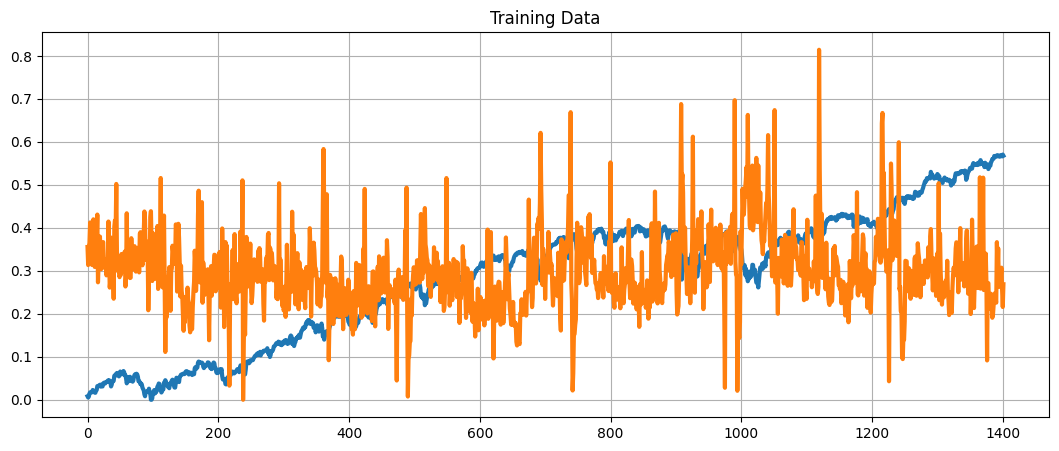

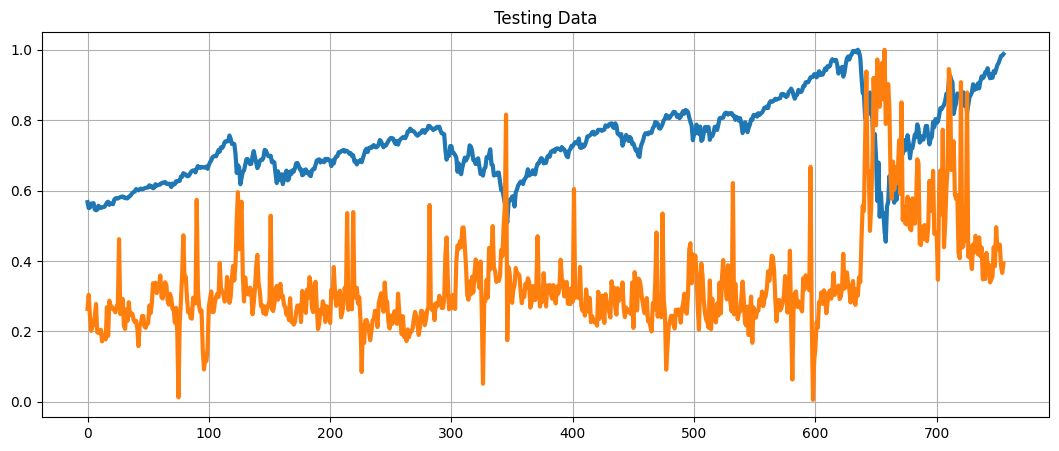

In [34]:
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')

show_plot(X_test, 'Testing Data')

In [35]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)


Ridge()

In [36]:
lr_accuracy = regression_model.score(X_test, y_test)
print('Ridge Regresssion Score: ', lr_accuracy)


Ridge Regresssion Score:  0.9513167837265529


In [37]:
predicted_prices = regression_model.predict(X)
predicted_prices


array([[0.01766673],
       [0.01461495],
       [0.01682302],
       ...,
       [0.96114394],
       [0.96206464],
       [0.9663562 ]])

In [38]:
predicted = []
for i in predicted_prices:
  predicted.append(i[0])


In [39]:

len(predicted)

2158

In [40]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [41]:
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [42]:
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.008282
1,2012-01-13,0.005242
2,2012-01-17,0.007414
3,2012-01-18,0.014231
4,2012-01-19,0.017295
...,...,...
2153,2020-08-04,0.962222
2154,2020-08-05,0.972307
2155,2020-08-06,0.982453
2156,2020-08-07,0.983459


In [43]:
df_predicted['Prediction'] = predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.008282,0.017667
1,2012-01-13,0.005242,0.014615
2,2012-01-17,0.007414,0.016823
3,2012-01-18,0.014231,0.023452
4,2012-01-19,0.017295,0.026541
...,...,...,...
2153,2020-08-04,0.962222,0.941668
2154,2020-08-05,0.972307,0.951470
2155,2020-08-06,0.982453,0.961144
2156,2020-08-07,0.983459,0.962065


In [44]:
interactive_plot(df_predicted, 'Original vs Artifical Intelligence')


In [45]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [46]:
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[6.01985700e+01, 5.31468000e+07],
       [5.99728580e+01, 5.65054000e+07],
       [6.06714290e+01, 6.07243000e+07],
       ...,
       [4.44450012e+02, 4.94533000e+07],
       [4.50910004e+02, 5.31009000e+07],
       [4.37500000e+02, 4.68711000e+07]])

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_data)


In [48]:
X = []
y = []
for i in range(1, len(price_volume_df)):
  X.append(training_set_scaled [i-1:i, 0])
  y.append(training_set_scaled [i, 0])

In [49]:
X

[array([0.01102638]),
 array([0.01046185]),
 array([0.01220906]),
 array([0.01378478]),
 array([0.01329884]),
 array([0.01063693]),
 array([0.01317736]),
 array([0.01067623]),
 array([0.02005545]),
 array([0.01933012]),
 array([0.02027698]),
 array([0.02232433]),
 array([0.02356417]),
 array([0.02346055]),
 array([0.02307824]),
 array([0.02470754]),
 array([0.02624037]),
 array([0.02797688]),
 array([0.03078171]),
 array([0.03667365]),
 array([0.03676297]),
 array([0.04004303]),
 array([0.04249412]),
 array([0.0382815]),
 array([0.03990367]),
 array([0.03987152]),
 array([0.04442]),
 array([0.04377327]),
 array([0.04497023]),
 array([0.0471212]),
 array([0.04831818]),
 array([0.05176615]),
 array([0.054278]),
 array([0.05500331]),
 array([0.05525701]),
 array([0.05096223]),
 array([0.04992603]),
 array([0.05007968]),
 array([0.0541172]),
 array([0.05525344]),
 array([0.05769381]),
 array([0.06344641]),
 array([0.07112129]),
 array([0.06968493]),
 array([0.0696885]),
 array([0.07523743]

In [50]:
X = np.asarray(X)
y = np.asarray(y)


In [51]:
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]


In [52]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape


((1510, 1, 1), (648, 1, 1))

In [53]:
X_train.shape[0]


1510

In [54]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [55]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)


Epoch 1/20
38/38 [==============================] - 9s 56ms/step - loss: 0.0036 - val_loss: 0.0190
Epoch 2/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/20
38/38 [==============================] - 1s 14ms/step - loss: 1.0711e-04 - val_loss: 1.2582e-04
Epoch 4/20
38/38 [==============================] - 1s 15ms/step - loss: 5.4051e-05 - val_loss: 2.6065e-05
Epoch 5/20
38/38 [==============================] - 1s 14ms/step - loss: 4.6903e-05 - val_loss: 2.2319e-05
Epoch 6/20
38/38 [==============================] - 1s 15ms/step - loss: 3.8713e-05 - val_loss: 4.5739e-05
Epoch 7/20
38/38 [==============================] - 1s 15ms/step - loss: 4.1811e-05 - val_loss: 1.8370e-05
Epoch 8/20
38/38 [==============================] - 1s 14ms/step - loss: 3.9165e-05 - val_loss: 1.6628e-05
Epoch 9/20
38/38 [==============================] - 1s 15ms/step - loss: 3.7161e-05 - val_loss: 1.7613e-05
Epoch 10/20
38/38 [==============================] - 

In [56]:
predicted = model.predict(X)

68/68 [==============================] - 3s 5ms/step


In [57]:
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])


In [58]:

test_predicted

[0.012820495,
 0.0122670485,
 0.013979996,
 0.015524962,
 0.015048492,
 0.012438681,
 0.0149293775,
 0.012477211,
 0.021674749,
 0.02096329,
 0.021892048,
 0.023900447,
 0.02511681,
 0.025015151,
 0.024640072,
 0.026238617,
 0.027742647,
 0.02944668,
 0.03219942,
 0.03798329,
 0.038070988,
 0.041291684,
 0.043698777,
 0.039561972,
 0.04115484,
 0.041123264,
 0.045590296,
 0.04495509,
 0.046130747,
 0.048243612,
 0.049419485,
 0.052807055,
 0.05527524,
 0.055988,
 0.056237325,
 0.05201716,
 0.050999098,
 0.05115006,
 0.055117227,
 0.05623381,
 0.05863215,
 0.06428673,
 0.071833044,
 0.070420556,
 0.070424065,
 0.07588122,
 0.077589236,
 0.07637322,
 0.07526271,
 0.074106544,
 0.07794773,
 0.08058384,
 0.081687555,
 0.078959964,
 0.07533651,
 0.08204259,
 0.08580059,
 0.084039286,
 0.08733347,
 0.088230036,
 0.085491225,
 0.08470373,
 0.08349792,
 0.07733267,
 0.06851278,
 0.07890372,
 0.078425735,
 0.0710811,
 0.066000946,
 0.065551296,
 0.061540045,
 0.079009175,
 0.07820078,
 0.076548

In [59]:

df_predicted = price_volume_df[1:][['Date', 'Close']]
df_predicted

,Date,Close
1,2012-01-13,59.972858
2,2012-01-17,60.671429
3,2012-01-18,61.301430
4,2012-01-19,61.107143
5,2012-01-20,60.042858
...,...,...
2154,2020-08-05,440.250000
2155,2020-08-06,455.609985
2156,2020-08-07,444.450012
2157,2020-08-10,450.910004


In [60]:
df_predicted['predictions'] = test_predicted
df_predicted

,Date,Close,predictions
1,2012-01-13,59.972858,0.012820
2,2012-01-17,60.671429,0.012267
3,2012-01-18,61.301430,0.013980
4,2012-01-19,61.107143,0.015525
5,2012-01-20,60.042858,0.015048
...,...,...,...
2154,2020-08-05,440.250000,0.921154
2155,2020-08-06,455.609985,0.924703
2156,2020-08-07,444.450012,0.958808
2157,2020-08-10,450.910004,0.934062


In [61]:

df_predicted = price_volume_df[1:][['Date']]
df_predicted


,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [62]:
df_predicted['Predictions'] = test_predicted
df_predicted

,Date,Predictions
1,2012-01-13,0.012820
2,2012-01-17,0.012267
3,2012-01-18,0.013980
4,2012-01-19,0.015525
5,2012-01-20,0.015048
...,...,...
2154,2020-08-05,0.921154
2155,2020-08-06,0.924703
2156,2020-08-07,0.958808
2157,2020-08-10,0.934062


In [63]:

close = []
for i in training_set_scaled:
  close.append(i[0])


In [64]:
close


[0.011026384814221801,
 0.010461850751312146,
 0.012209064567417965,
 0.013784776200681387,
 0.013298840009958124,
 0.010636929543771906,
 0.013177355336995877,
 0.010676229730427894,
 0.020055450755057824,
 0.019330121828027513,
 0.02027698295340838,
 0.02232432934117673,
 0.023564167317859763,
 0.023460550686230847,
 0.02307824113163892,
 0.02470754438327427,
 0.026240369215761894,
 0.027976878214271583,
 0.030781713002119487,
 0.03667364710814455,
 0.03676296980693192,
 0.040043025963404616,
 0.0424941190533388,
 0.0382815032077036,
 0.039903670747983455,
 0.03987151627718541,
 0.04441999577489858,
 0.043773267221180245,
 0.0449702284015899,
 0.04712119642323834,
 0.048318177612652835,
 0.051766154340099235,
 0.05427800477326816,
 0.05500331369129366,
 0.05525701036494465,
 0.05096222754088253,
 0.04992603371221188,
 0.05007968286047457,
 0.054117199904645114,
 0.055253443759829685,
 0.05769381202316293,
 0.06344640842164612,
 0.07112129492756925,
 0.06968492850522454,
 0.0696884976

In [65]:
df_predicted['Close'] = close[1:]


In [66]:
df_predicted


,Date,Predictions,Close
1,2012-01-13,0.012820,0.010462
2,2012-01-17,0.012267,0.012209
3,2012-01-18,0.013980,0.013785
4,2012-01-19,0.015525,0.013299
5,2012-01-20,0.015048,0.010637
...,...,...,...
2154,2020-08-05,0.921154,0.961583
2155,2020-08-06,0.924703,1.000000
2156,2020-08-07,0.958808,0.972088
2157,2020-08-10,0.934062,0.988245


In [67]:
interactive_plot(df_predicted, 'Original price vs LSTM Predictions')
